In [15]:
import yfinance as yf

sp500 = yf.Ticker("^GSPC")
# ^ -> stock index
# GSPC -> General Standard & Poor's Composite
sp500

yfinance.Ticker object <^GSPC>

In [16]:
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-10 00:00:00-05:00,5890.350098,5890.350098,5807.779785,5827.040039,4751930000,0.0,0.0
2025-01-13 00:00:00-05:00,5782.020020,5838.609863,5773.310059,5836.220215,4421200000,0.0,0.0
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,0.0,0.0


In [18]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-01-02 00:00:00-05:00', '2025-01-03 00:00:00-05:00',
               '2025-01-06 00:00:00-05:00', '2025-01-07 00:00:00-05:00',
               '2025-01-08 00:00:00-05:00', '2025-01-10 00:00:00-05:00',
               '2025-01-13 00:00:00-05:00', '2025-01-14 00:00:00-05:00',
               '2025-01-15 00:00:00-05:00', '2025-01-16 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24377, freq=None)

Text(0.5, 1.0, 'S&P 500 closing prices over time')

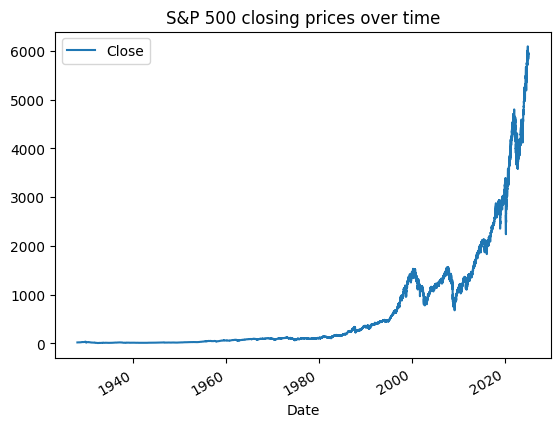

In [22]:
ax = sp500.plot.line(y="Close", use_index=True)
ax.set_title("S&P 500 closing prices over time")

### Deleting cols - dividends and stock splits are not key for stock indexes

In [28]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [23]:
sp500['Tommorow'] = sp500['Close'].shift(-1)

In [24]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tommorow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,17.500000
...,...,...,...,...,...,...,...,...
2025-01-10 00:00:00-05:00,5890.350098,5890.350098,5807.779785,5827.040039,4751930000,0.0,0.0,5836.220215
2025-01-13 00:00:00-05:00,5782.020020,5838.609863,5773.310059,5836.220215,4421200000,0.0,0.0,5842.910156
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,0.0,0.0,5949.910156


In [26]:
sp500['Target'] = (sp500['Tommorow'] > sp500['Close'])

In [29]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,True
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,False
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,False
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,True
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,False
...,...,...,...,...,...,...,...
2025-01-10 00:00:00-05:00,5890.350098,5890.350098,5807.779785,5827.040039,4751930000,5836.220215,True
2025-01-13 00:00:00-05:00,5782.020020,5838.609863,5773.310059,5836.220215,4421200000,5842.910156,True
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,5949.910156,True


In [31]:
sp500 = sp500.loc["1990-01-01":]

In [33]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,False
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,False
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,False
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,True
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,False
...,...,...,...,...,...,...,...
2025-01-10 00:00:00-05:00,5890.350098,5890.350098,5807.779785,5827.040039,4751930000,5836.220215,True
2025-01-13 00:00:00-05:00,5782.020020,5838.609863,5773.310059,5836.220215,4421200000,5842.910156,True
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,5949.910156,True


## Random Forest
#### Features:
* **Reduce overfitting**
* **Reduce bias**

#### Key Parameters:
* **Node size**
* **Number of trees**
* **Number of features**

**Information gain** - A measure of how well a feature separates data into less uncertain subsets.

**Decision tree** - A type of model that splits data recursively using decision nodes until only leaf nodes remain.

**Why are decision trees suboptimal?**
Decision trees are highly sensitive to training data; even small changes in the data can result in drastically different trees, making them harder to generalize across datasets.

**Process of Building a Random Forest:**
1. **Bootstrapping**: Sampling with replacement (allowing duplicated rows) and randomly selecting a subset of features for each tree.
2. **Aggregating**: Combining predictions from all trees.
3. **Bagging**: Bootstrapping + Aggregating.

**Tips:**
* How many features to consider?
  Use the **logarithm (log)** or **square root (sqrt)** of the total number of features
* Random Forests can also be applied to regression problems by averaging the predictions of all trees.

In [ ]:
from sklearn